## Case: Hotel Booking 


source: https://www.sciencedirect.com/science/article/pii/S2352340918315191

*This data article describes two datasets with hotel demand data. One of the hotels (H1) is a resort hotel and the other is a city hotel (H2). Both datasets share the same structure, with 31 variables describing the 40,060 observations of H1 and 79,330 observations of H2. Each observation represents a hotel booking. Both datasets comprehend bookings due to arrive between the 1st of July of 2015 and the 31st of August 2017, including bookings that effectively arrived and bookings that were canceled. Both hotels are located in Portugal: H1 at the resort region of Algarve and H2 at the city of Lisbon.*

The goal is to help the two hotels maximize their revenue.

|variable                       |class     |description |
|:------------------------------|:---------|:-----------|
|hotel                          |character | Hotel (H1 = Resort Hotel or H2 = City Hotel) |
|is_canceled                    |double    | Value indicating if the booking was canceled (1) or not (0) |
|lead_time                      |double    | Number of days that elapsed between the entering date of the booking into the PMS and the arrival date |
|arrival_date_year              |double    | Year of arrival date|
|arrival_date_month             |character | Month of arrival date|
|arrival_date_week_number       |double    | Week number of year for arrival date|
|arrival_date_day_of_month      |double    | Day of arrival date|
|stays_in_weekend_nights        |double    | Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel |
|stays_in_week_nights           |double    |  Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel|
|adults                         |double    | Number of adults|
|children                       |double    | Number of children|
|babies                         |double    |Number of babies |
|meal                           |character | Type of meal booked. Categories are presented in standard hospitality meal packages: <br> Undefined/SC – no meal package;<br>BB – Bed & Breakfast; <br> HB – Half board (breakfast and one other meal – usually dinner); <br> FB – Full board (breakfast, lunch and dinner) |
|country                        |character | Country of origin. Categories are represented in the ISO 3155–3:2013 format |
|market_segment                 |character | Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators” |
|distribution_channel           |character | Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators” |
|is_repeated_guest              |double    | Value indicating if the booking name was from a repeated guest (1) or not (0) |
|previous_cancellations         |double    | Number of previous bookings that were cancelled by the customer prior to the current booking |
|previous_bookings_not_canceled |double    | Number of previous bookings not cancelled by the customer prior to the current booking |
|reserved_room_type             |character | Code of room type reserved. Code is presented instead of designation for anonymity reasons |
|assigned_room_type             |character | Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons |
|booking_changes                |double    | Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation|
|deposit_type                   |character | Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories:<br>No Deposit – no deposit was made;<br>Non Refund – a deposit was made in the value of the total stay cost;<br>Refundable – a deposit was made with a value under the total cost of stay. |
|agent                          |character | ID of the travel agency that made the booking |
|company                        |character | ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons |
|days_in_waiting_list           |double    | Number of days the booking was in the waiting list before it was confirmed to the customer |
|customer_type                  |character | Type of booking, assuming one of four categories:<br>Contract - when the booking has an allotment or other type of contract associated to it;<br>Group – when the booking is associated to a group;<br>Transient – when the booking is not part of a group or contract, and is not associated to other transient booking;<br>Transient-party – when the booking is transient, but is associated to at least other transient booking|
|adr                            |double    | Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights |
|required_car_parking_spaces    |double    | Number of car parking spaces required by the customer |
|total_of_special_requests      |double    | Number of special requests made by the customer (e.g. twin bed or high floor)|
|reservation_status             |character | Reservation last status, assuming one of three categories:<br>Canceled – booking was canceled by the customer;<br>Check-Out – customer has checked in but already departed;<br>No-Show – customer did not check-in and did inform the hotel of the reason why |
|reservation_status_date        |double    | Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel|



## Packages and data

In [1]:
# Uncomment to install 
# %pip install pandas
# %pip install numpy
# %pip install seaborn 
# %pip install plotly 

In [2]:
# Pandas is typically imported as pd by convention
# Numpy is typically imported as np by convention
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
pd.options.display.float_format = '{:.2f}'.format

In [4]:
h1 = pd.read_csv("data/input/H1.csv")

In [5]:
h2 = pd.read_csv("data/input/H2.csv")

## EDA

Exploratory Data Analysis (EDA) is a crucial step in data analysis where the main goal is to summarize the main characteristics of the data, often with the help of visualizations and summary statistics. In Python, EDA is typically performed using libraries such as Pandas, NumPy, Matplotlib, Seaborn, and Plotly.


Pandas stands for panel data, a type of dataset used in economics. Although this was the reason Pandas was invented, it is widely used in across analytics and one of Python's many "killer apps". Essentially, it's a package that makes Python unique compared to some of its competitors. The package makes it incredibly easy to read and write data from different file formats. On top of that it comes with many operations that make working with data easy.

Business people might  questions like:

- Are we booking rooms correctly in our system? Do all bookings have quests?

- Where do the guests come from?

- How much do they pay per night?

- Does the price vary per time of the year?

- When are the hotels the busiest?

- How long do customers stay? Are there any noticeable differences?

- When and for which type of customers do the biggest cancellations happen?

- We will try and answer all of these.

In [6]:
h1.head()

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
0,0,342,2015,July,27,1,0,0,2,0,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,0,737,2015,July,27,1,0,0,2,0,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,0,7,2015,July,27,1,0,1,1,0,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,0,13,2015,July,27,1,0,1,1,0,...,No Deposit,304.00,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,0,14,2015,July,27,1,0,2,2,0,...,No Deposit,240.00,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03


In [7]:
h2.head()

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
0,0,6,2015,July,27,1,0,2,1,0.00,...,No Deposit,6.00,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-03
1,1,88,2015,July,27,1,0,4,2,0.00,...,No Deposit,9.00,NaN,0,Transient,76.50,0,1,Canceled,2015-07-01
2,1,65,2015,July,27,1,0,4,1,0.00,...,No Deposit,9.00,NaN,0,Transient,68.00,0,1,Canceled,2015-04-30
3,1,92,2015,July,27,1,2,4,2,0.00,...,No Deposit,9.00,NaN,0,Transient,76.50,0,2,Canceled,2015-06-23
4,1,100,2015,July,27,2,0,2,2,0.00,...,No Deposit,9.00,NaN,0,Transient,76.50,0,1,Canceled,2015-04-02


### Merging and cleaning data

In [8]:
h1["hotel"] = "Resort hotel"
h2["hotel"] = "City hotel"
hotel_df = pd.concat([h1, h2], ignore_index=True)

In [9]:
hotel_df.head()

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate,hotel
0,0,342,2015,July,27,1,0,0,2,0.00,...,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01,Resort hotel
1,0,737,2015,July,27,1,0,0,2,0.00,...,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01,Resort hotel
2,0,7,2015,July,27,1,0,1,1,0.00,...,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02,Resort hotel
3,0,13,2015,July,27,1,0,1,1,0.00,...,304.00,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02,Resort hotel
4,0,14,2015,July,27,1,0,2,2,0.00,...,240.00,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03,Resort hotel


In [10]:
hotel_df = hotel_df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

In [11]:
hotel_df.head()

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate,hotel
0,0,342,2015,July,27,1,0,0,2,0.00,...,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01,Resort hotel
1,0,737,2015,July,27,1,0,0,2,0.00,...,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01,Resort hotel
2,0,7,2015,July,27,1,0,1,1,0.00,...,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02,Resort hotel
3,0,13,2015,July,27,1,0,1,1,0.00,...,304.00,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02,Resort hotel
4,0,14,2015,July,27,1,0,2,2,0.00,...,240.00,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03,Resort hotel


In [12]:
# check for missing values
hotel_df.isnull().sum()

IsCanceled                          0
LeadTime                            0
ArrivalDateYear                     0
ArrivalDateMonth                    0
ArrivalDateWeekNumber               0
ArrivalDateDayOfMonth               0
StaysInWeekendNights                0
StaysInWeekNights                   0
Adults                              0
Children                            4
Babies                              0
Meal                                0
Country                           488
MarketSegment                       0
DistributionChannel                 0
IsRepeatedGuest                     0
PreviousCancellations               0
PreviousBookingsNotCanceled         0
ReservedRoomType                    0
AssignedRoomType                    0
BookingChanges                      0
DepositType                         0
Agent                           16340
Company                        112593
DaysInWaitingList                   0
CustomerType                        0
ADR         

In [13]:
# Replace missing values 
nan_replacements = {"Children:": 0.0,"Country": "Unknown", "Agent": -1, "Company": -1}

hotel_df = hotel_df.fillna(nan_replacements)
hotel_df["Company"].replace("NULL",9999)
hotel_df.head()

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate,hotel
0,0,342,2015,July,27,1,0,0,2,0.00,...,-1.00,-1.00,0,Transient,0.00,0,0,Check-Out,2015-07-01,Resort hotel
1,0,737,2015,July,27,1,0,0,2,0.00,...,-1.00,-1.00,0,Transient,0.00,0,0,Check-Out,2015-07-01,Resort hotel
2,0,7,2015,July,27,1,0,1,1,0.00,...,-1.00,-1.00,0,Transient,75.00,0,0,Check-Out,2015-07-02,Resort hotel
3,0,13,2015,July,27,1,0,1,1,0.00,...,304.00,-1.00,0,Transient,75.00,0,0,Check-Out,2015-07-02,Resort hotel
4,0,14,2015,July,27,1,0,2,2,0.00,...,240.00,-1.00,0,Transient,98.00,0,1,Check-Out,2015-07-03,Resort hotel


In [14]:
# Remove bookings without guests 
zeroRows = hotel_df["Adults"] + hotel_df["Children"] + hotel_df["Babies"] == 0
zeroRows.sum()
zeroRowsIndexes = hotel_df.loc[zeroRows].index
hotel_df = hotel_df.drop(zeroRowsIndexes)

❓❓❓ **TASK**

Explore the dataset: 

- Data Exploration: Univariate
- Data Exploration: Bivariate
- Visualisations
    

<Axes: title={'center': 'Correlation chart'}>

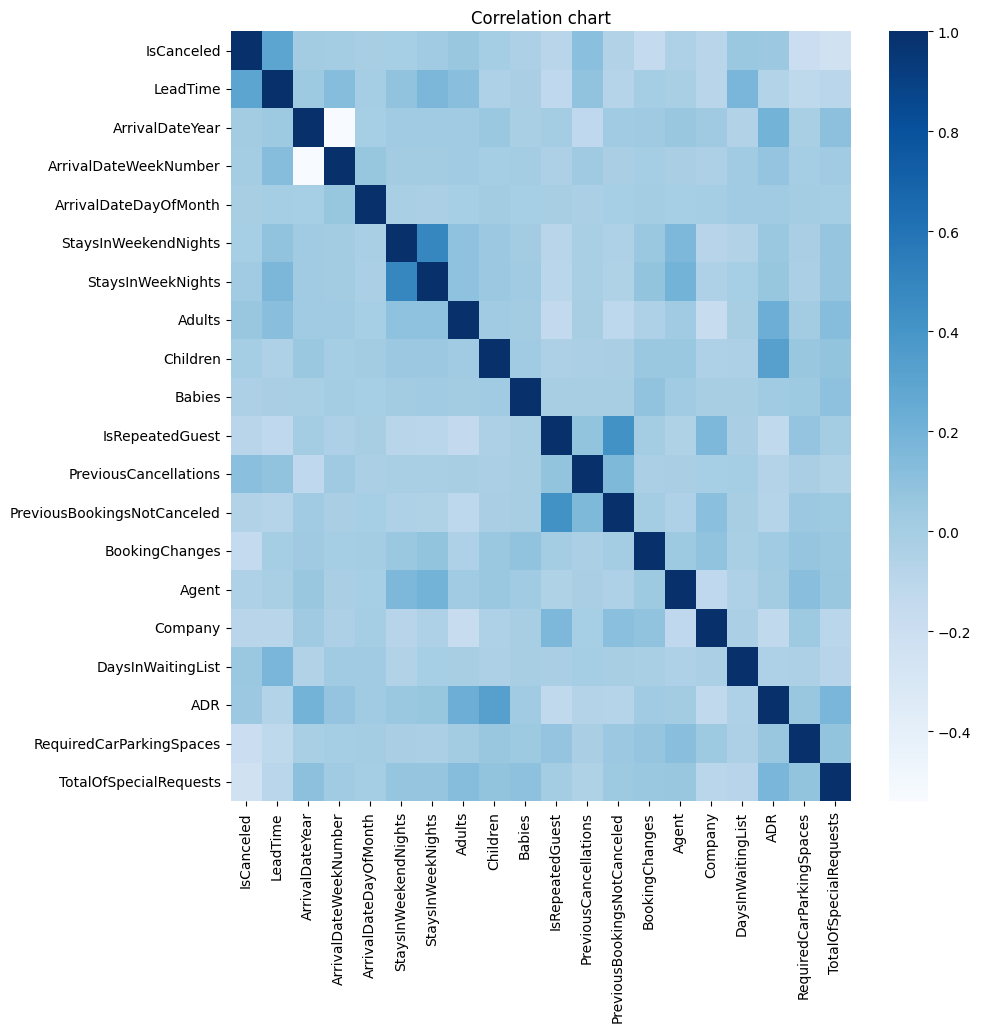

In [15]:
# For example, make a heatmap to investigate which variables are correlated

fig, ax = plt.subplots(figsize=(10,10))
ax.set_title("Correlation chart")
sns.heatmap(hotel_df.corr(numeric_only=True), cmap= "Blues",ax=ax)

## Write dataframe to a CSV

In [16]:
hotel_df.to_csv("data/output/hotel_dataset_cleaned.csv",index=False)